In [1]:
#simple linear regressionTarget variable is the number of kills
#predict based on number of rounds 
#this will serve as a baseline to compare a multiregression to

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

plt.style.use('fivethirtyeight')

In [3]:
dow = pd.read_csv('data/dow_zombie_stats')
dow.drop(columns='Unnamed: 0',inplace=True)

In [4]:
#There are three assumptions for a linear regression:
# linear
#normal
#homoscedastisity
dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       35 non-null     object
 1   Rounds     35 non-null     int64 
 2   kills      35 non-null     int64 
 3   downs      35 non-null     int64 
 4   revives    35 non-null     int64 
 5   headshots  35 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


array([[<AxesSubplot:xlabel='Rounds', ylabel='Rounds'>,
        <AxesSubplot:xlabel='kills', ylabel='Rounds'>,
        <AxesSubplot:xlabel='downs', ylabel='Rounds'>,
        <AxesSubplot:xlabel='revives', ylabel='Rounds'>,
        <AxesSubplot:xlabel='headshots', ylabel='Rounds'>],
       [<AxesSubplot:xlabel='Rounds', ylabel='kills'>,
        <AxesSubplot:xlabel='kills', ylabel='kills'>,
        <AxesSubplot:xlabel='downs', ylabel='kills'>,
        <AxesSubplot:xlabel='revives', ylabel='kills'>,
        <AxesSubplot:xlabel='headshots', ylabel='kills'>],
       [<AxesSubplot:xlabel='Rounds', ylabel='downs'>,
        <AxesSubplot:xlabel='kills', ylabel='downs'>,
        <AxesSubplot:xlabel='downs', ylabel='downs'>,
        <AxesSubplot:xlabel='revives', ylabel='downs'>,
        <AxesSubplot:xlabel='headshots', ylabel='downs'>],
       [<AxesSubplot:xlabel='Rounds', ylabel='revives'>,
        <AxesSubplot:xlabel='kills', ylabel='revives'>,
        <AxesSubplot:xlabel='downs', ylabel='rev

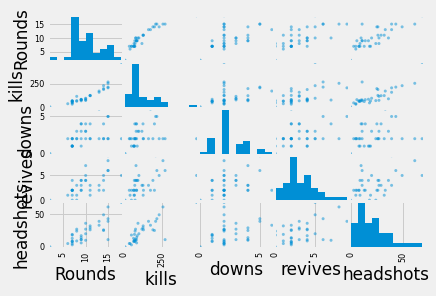

In [5]:
pd.plotting.scatter_matrix(dow)
#I'm going to try to normalize rounds to see if it helps

C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rounds', ylabel='kills'>

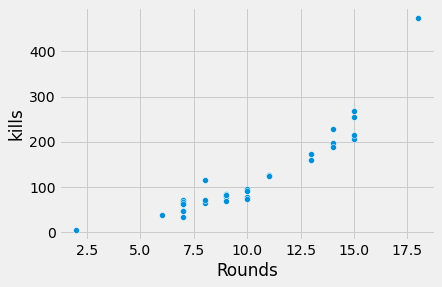

In [6]:
#first check linearity with a scatter plot
sns.scatterplot('Rounds','kills',data=dow)
#looks good

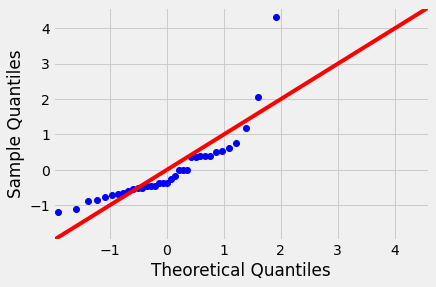

In [7]:
#check for normality
#dow.kills.hist()
#not very normal
f = 'kills~Rounds'
model = smf.ols(formula=f, data=dow).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
#eh looks fine

In [8]:
model.summary()
#0.82 is alright

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kills   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.2
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           6.61e-14
Time:                        11:00:59   Log-Likelihood:                -176.87
No. Observations:                  35   AIC:                             357.7
Df Residuals:                      33   BIC:                             360.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -121.0451     20.654     -5.861      0.000    -163.066     -79.024
Rounds        24.0073      1.946     12.336      0.000      20.048      27.967
==============================================================================
Omnibus:                       38.060   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.366
Skew:                           2.452   Prob(JB):                     1.63e-27
Kurtosis:                      10.781   Cond. No.                         33.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

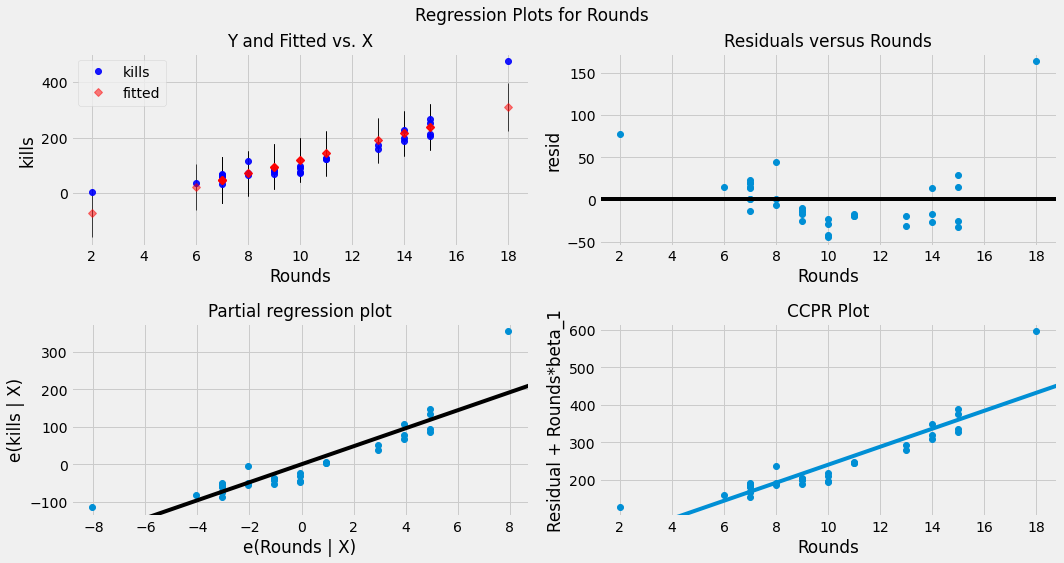

In [9]:
#look at error
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Rounds", fig=fig)
plt.show()

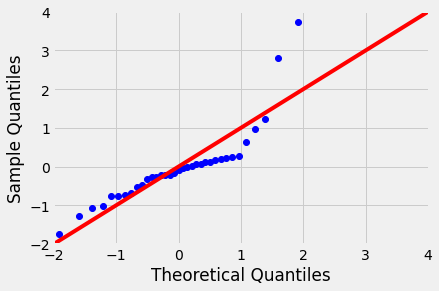

In [10]:
f = 'kills~headshots'
model = smf.ols(formula=f, data=dow).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

In [11]:
model.summary()
#not as good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kills   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     61.60
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           4.78e-09
Time:                        11:01:00   Log-Likelihood:                -188.62
No. Observations:                  35   AIC:                             381.2
Df Residuals:                      33   BIC:                             384.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9521     15.777      1.265      0.215     -12.147      52.051
headshots      4.5015      0.574      7.849      0.000       3.335       5.668
==============================================================================
Omnibus:                       27.523   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.592
Skew:                           1.895   Prob(JB):                     5.14e-13
Kurtosis:                       7.944   Cond. No.                         47.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""